In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_TS=pd.read_csv('AnnualTicketSales.csv')

In [3]:
df_TS.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [4]:
df_TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   TICKETS SOLD                         27 non-null     object 
 2   TOTAL BOX OFFICE                     27 non-null     object 
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     object 
 4   AVERAGE TICKET PRICE                 27 non-null     object 
 5   Unnamed: 5                           0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ KB


In [5]:
df_TS.isnull().sum()

YEAR                                    0
TICKETS SOLD                            0
TOTAL BOX OFFICE                        0
TOTAL INFLATION ADJUSTED BOX OFFICE     0
AVERAGE TICKET PRICE                    0
Unnamed: 5                             27
dtype: int64

In [6]:
df_TS.shape

(27, 6)

In [7]:
df_TS.drop('Unnamed: 5', inplace=True, axis=1)

In [8]:
df_TS.shape

(27, 5)

In [9]:
df_TS.describe()

,YEAR
count,27.000000
mean,2008.000000
std,7.937254
min,1995.000000
25%,2001.500000
50%,2008.000000
75%,2014.500000
max,2021.000000


In [10]:
df_TS.columns

Index(['YEAR', 'TICKETS SOLD', 'TOTAL BOX OFFICE',
       'TOTAL INFLATION ADJUSTED BOX OFFICE', 'AVERAGE TICKET PRICE'],
      dtype='object')

In [11]:
df_TS['TOTAL BOX OFFICE'] = df_TS['TOTAL BOX OFFICE'].str.lstrip('$')
df_TS['TOTAL BOX OFFICE'] = df_TS['TOTAL BOX OFFICE'].str.replace(',','')

In [12]:
df_TS['TOTAL INFLATION ADJUSTED BOX OFFICE'] = df_TS['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace('$','')
df_TS['TOTAL INFLATION ADJUSTED BOX OFFICE'] = df_TS['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(',','')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [13]:
df_TS['AVERAGE TICKET PRICE'] = df_TS['AVERAGE TICKET PRICE'].apply(lambda x:x[1:])
df_TS['AVERAGE TICKET PRICE'] = df_TS['AVERAGE TICKET PRICE'].str.replace(',','')
df_TS['TICKETS SOLD'] = df_TS['TICKETS SOLD'].str.replace(',','')

In [14]:
df_TS['TOTAL BOX OFFICE'] = df_TS['TOTAL BOX OFFICE'].astype('int64')
df_TS['TOTAL INFLATION ADJUSTED BOX OFFICE'] = df_TS['TOTAL INFLATION ADJUSTED BOX OFFICE'].astype('int64')
df_TS['AVERAGE TICKET PRICE'] = df_TS['AVERAGE TICKET PRICE'].astype('float')
df_TS['TICKETS SOLD'] = df_TS['TICKETS SOLD'].astype('int64')

In [15]:
df_TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YEAR                                 27 non-null     int64  
 1   TICKETS SOLD                         27 non-null     int64  
 2   TOTAL BOX OFFICE                     27 non-null     int64  
 3   TOTAL INFLATION ADJUSTED BOX OFFICE  27 non-null     int64  
 4   AVERAGE TICKET PRICE                 27 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.2 KB


<BarContainer object of 27 artists>

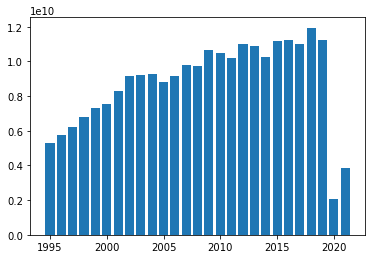

In [16]:
# visualization of Age and Purchase
#sns.barplot(x='YEAR',y='TOTAL BOX OFFICE', data= df_TS)
#plt.xticks(rotation=90)
plt.bar(df_TS['YEAR'],df_TS['TOTAL BOX OFFICE'])

<BarContainer object of 27 artists>

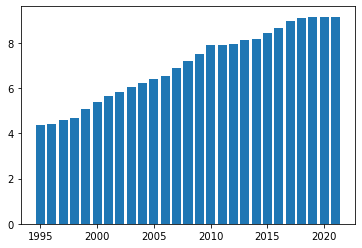

In [17]:
plt.bar(df_TS['YEAR'],df_TS['AVERAGE TICKET PRICE'])

<BarContainer object of 27 artists>

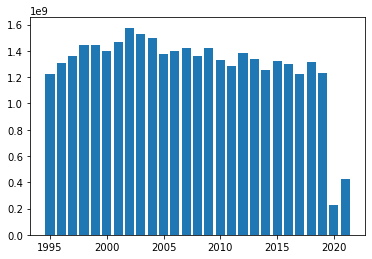

In [18]:
plt.bar(df_TS['YEAR'],df_TS['TICKETS SOLD'])

<AxesSubplot:>

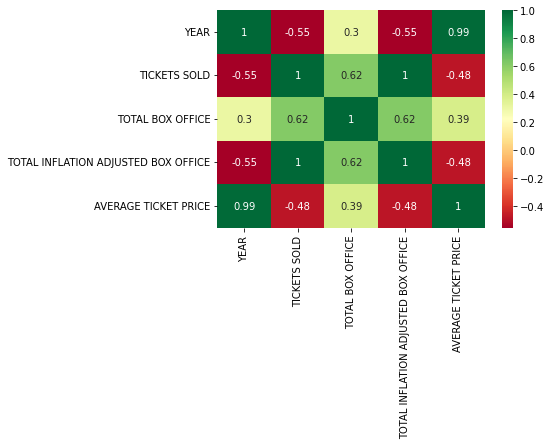

In [19]:
corr_mat = df_TS.corr()
Feature = corr_mat.index
sns.heatmap(df_TS[Feature].corr(),annot=True,cmap="RdYlGn")

###### Obs: Positive correlation bw Total box office and Ticket sold
    strong correlation bw Ticket sold and Total Inflation Adjusted box office
    Negative relation bw ticket sold and year as seen in decreasing trend by graph and in 2019,2020,2021 due to pendemic graph bar is small

In [20]:
df_HG = pd.read_csv('HighestGrossers.csv')

In [21]:
df_HG.tail()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
22,2017,Star Wars Ep. VIII: The Last Jedi,Action,PG-13,Walt Disney,"$517,218,368","$528,173,936","5,76,60,910"
23,2018,Black Panther,Action,PG-13,Walt Disney,"$700,059,566","$703,901,821","7,68,45,177"
24,2019,Avengers: Endgame,NaN,PG-13,Walt Disney,"$858,373,000","$858,373,002","9,37,08,843"
25,2020,Bad Boys For Life,NaN,R,Sony Pictures,"$204,417,855","$204,417,848","2,23,16,359"
26,2021,Shang-Chi and the Legend of the Ten Rings,NaN,PG-13,Walt Disney,"$224,226,704","$224,226,704","2,44,78,897"


In [22]:
df_HG.DISTRIBUTOR.value_counts()

Walt Disney           12
Warner Bros.           4
Sony Pictures          4
20th Century Fox       3
Paramount Pictures     2
Universal              1
Dreamworks SKG         1
Name: DISTRIBUTOR, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

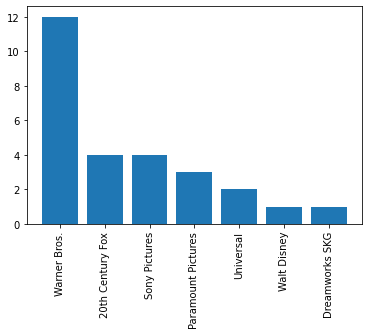

In [23]:
plt.bar(df_HG.DISTRIBUTOR.unique(),df_HG.DISTRIBUTOR.value_counts())
plt.xticks(rotation=90)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

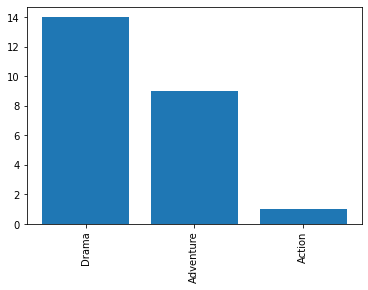

In [24]:
df_HG1 = df_HG[df_HG.GENRE.notnull()]
plt.bar(df_HG1.GENRE.unique(),df_HG1.GENRE.value_counts())
plt.xticks(rotation=90)

In [25]:
df_HG['TICKETS SOLD']=df_HG['TICKETS SOLD'].str.replace(',','')
df_HG['TICKETS SOLD']=df_HG['TICKETS SOLD'].astype(int)

In [26]:
df_HG['TOTAL IN 2019 DOLLARS'] = df_HG['TOTAL IN 2019 DOLLARS'].str.replace(',','').str.replace('$','')
df_HG['TOTAL IN 2019 DOLLARS'] = df_HG['TOTAL IN 2019 DOLLARS'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [27]:
df_HG['TOTAL FOR YEAR'] = df_HG['TOTAL FOR YEAR'].str.replace(',','').str.replace('$','')
df_HG['TOTAL FOR YEAR'] = df_HG['TOTAL FOR YEAR'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [28]:
df_HG.isnull().sum()

YEAR                     0
MOVIE                    0
GENRE                    3
MPAA RATING              0
DISTRIBUTOR              0
TOTAL FOR YEAR           0
TOTAL IN 2019 DOLLARS    0
TICKETS SOLD             0
dtype: int64

In [29]:
df_HG.columns

Index(['YEAR', 'MOVIE', 'GENRE', 'MPAA RATING', 'DISTRIBUTOR',
       'TOTAL FOR YEAR', 'TOTAL IN 2019 DOLLARS', 'TICKETS SOLD'],
      dtype='object')

In [30]:
df_HG['GENRE'].value_counts()

Adventure    14
Action        9
Drama         1
Name: GENRE, dtype: int64

In [31]:
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_HG['MPAA RATING']= label_encoder.fit_transform(df_HG['MPAA RATING'])
df_HG['DISTRIBUTOR']= label_encoder.fit_transform(df_HG['DISTRIBUTOR']) 
df_HG['GENRE']= label_encoder.fit_transform(df_HG['GENRE'])
df_HG['DISTRIBUTOR'].unique()

array([6, 0, 3, 2, 4, 5, 1])

In [32]:
df_HG.head()

,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,2,2,6,184031112,387522978,42306002
1,1996,Independence Day,1,2,0,306169255,634504608,69269062
2,1997,Men in Black,1,2,3,250650052,500207943,54607854
3,1998,Titanic,1,2,2,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,1,1,0,430443350,776153749,84732942


In [33]:
df_HG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   YEAR                   27 non-null     int64 
 1   MOVIE                  27 non-null     object
 2   GENRE                  27 non-null     int32 
 3   MPAA RATING            27 non-null     int32 
 4   DISTRIBUTOR            27 non-null     int32 
 5   TOTAL FOR YEAR         27 non-null     int32 
 6   TOTAL IN 2019 DOLLARS  27 non-null     int32 
 7   TICKETS SOLD           27 non-null     int32 
dtypes: int32(6), int64(1), object(1)
memory usage: 1.2+ KB


In [34]:
df_HG.describe()

,YEAR,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
count,27.000000,27.000000,27.000000,27.000000,2.700000e+01,2.700000e+01,2.700000e+01
mean,2008.000000,0.925926,1.703704,3.888889,4.192772e+08,5.537170e+08,6.044945e+07
std,7.937254,0.916764,0.668800,1.928198,1.631468e+08,1.699856e+08,1.855738e+07
min,1995.000000,0.000000,0.000000,0.000000,1.840311e+08,2.044178e+08,2.231636e+07
25%,2001.500000,0.000000,1.500000,3.000000,3.196123e+08,4.544314e+08,4.961042e+07
50%,2008.000000,1.000000,2.000000,5.000000,4.037064e+08,5.160503e+08,5.633737e+07
75%,2014.500000,1.000000,2.000000,5.000000,4.648073e+08,6.641301e+08,7.250329e+07
max,2021.000000,3.000000,3.000000,6.000000,8.583730e+08,8.658428e+08,9.452432e+07


In [35]:
df_HG.YEAR.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021], dtype=int64)

In [36]:
df_TS.columns

Index(['YEAR', 'TICKETS SOLD', 'TOTAL BOX OFFICE',
       'TOTAL INFLATION ADJUSTED BOX OFFICE', 'AVERAGE TICKET PRICE'],
      dtype='object')

In [37]:
df_TD=pd.read_csv('TopDistributors.csv')

In [38]:
#df_TD.head()

In [39]:
df_PDT = pd.read_csv('PopularCreativeTypes.csv')

In [40]:
#df_PDT.head()

In [41]:
df_WRC = pd.read_csv('WideReleasesCount.csv')

In [42]:
df_WRC.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS,Unnamed: 9
0,2021,17,7,0,4,16,17,61,38,NaN
1,2020,5,3,1,3,9,13,34,23,NaN
2,2019,18,10,11,9,18,21,87,44,NaN
3,2018,19,10,11,10,16,20,86,58,NaN
4,2017,18,8,14,10,16,15,81,50,NaN


In [43]:
df_WRC.drop('Unnamed: 9',inplace=True, axis=1)

In [44]:
df_WRC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   YEAR                 27 non-null     int64
 1   WARNER BROS          27 non-null     int64
 2   WALT DISNEY          27 non-null     int64
 3   20TH CENTURY FOX     27 non-null     int64
 4   PARAMOUNT PICTURES   27 non-null     int64
 5   SONY PICTURES        27 non-null     int64
 6   UNIVERSAL            27 non-null     int64
 7   TOTAL MAJOR 6        27 non-null     int64
 8   TOTAL OTHER STUDIOS  27 non-null     int64
dtypes: int64(9)
memory usage: 2.0 KB


In [45]:
df_WRC.shape

(27, 9)

In [46]:
df_WRC.isnull().sum()

YEAR                   0
WARNER BROS            0
WALT DISNEY            0
20TH CENTURY FOX       0
PARAMOUNT PICTURES     0
SONY PICTURES          0
UNIVERSAL              0
TOTAL MAJOR 6          0
TOTAL OTHER STUDIOS    0
dtype: int64

In [47]:
df_WRC.describe()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2008.000000,22.777778,15.000000,14.481481,11.703704,18.222222,16.518519,98.703704,33.259259
std,7.937254,6.417125,5.954959,5.286924,3.267731,3.609105,3.320917,19.751952,10.928412
min,1995.000000,5.000000,3.000000,0.000000,3.000000,9.000000,10.000000,34.000000,19.000000
25%,2001.500000,18.000000,11.000000,12.500000,10.000000,16.000000,13.500000,89.000000,24.000000
50%,2008.000000,22.000000,13.000000,15.000000,12.000000,18.000000,17.000000,104.000000,30.000000
75%,2014.500000,27.500000,20.500000,17.500000,14.000000,20.500000,19.500000,112.000000,42.000000
max,2021.000000,32.000000,25.000000,25.000000,16.000000,26.000000,22.000000,128.000000,58.000000


In [48]:
df_HG.columns

Index(['YEAR', 'MOVIE', 'GENRE', 'MPAA RATING', 'DISTRIBUTOR',
       'TOTAL FOR YEAR', 'TOTAL IN 2019 DOLLARS', 'TICKETS SOLD'],
      dtype='object')

In [49]:
df_TS.columns

Index(['YEAR', 'TICKETS SOLD', 'TOTAL BOX OFFICE',
       'TOTAL INFLATION ADJUSTED BOX OFFICE', 'AVERAGE TICKET PRICE'],
      dtype='object')

In [50]:
df_WRC.columns

Index(['YEAR', 'WARNER BROS', 'WALT DISNEY', '20TH CENTURY FOX',
       'PARAMOUNT PICTURES', 'SONY PICTURES', 'UNIVERSAL', 'TOTAL MAJOR 6',
       'TOTAL OTHER STUDIOS'],
      dtype='object')

In [51]:
df_WRC.head()

,YEAR,WARNER BROS,WALT DISNEY,20TH CENTURY FOX,PARAMOUNT PICTURES,SONY PICTURES,UNIVERSAL,TOTAL MAJOR 6,TOTAL OTHER STUDIOS
0,2021,17,7,0,4,16,17,61,38
1,2020,5,3,1,3,9,13,34,23
2,2019,18,10,11,9,18,21,87,44
3,2018,19,10,11,10,16,20,86,58
4,2017,18,8,14,10,16,15,81,50


In [52]:
lst = df_WRC.columns[df_WRC.columns != 'YEAR']
df_WRC[lst].idxmax(axis=1)

0     TOTAL MAJOR 6
1     TOTAL MAJOR 6
2     TOTAL MAJOR 6
3     TOTAL MAJOR 6
4     TOTAL MAJOR 6
5     TOTAL MAJOR 6
6     TOTAL MAJOR 6
7     TOTAL MAJOR 6
8     TOTAL MAJOR 6
9     TOTAL MAJOR 6
10    TOTAL MAJOR 6
11    TOTAL MAJOR 6
12    TOTAL MAJOR 6
13    TOTAL MAJOR 6
14    TOTAL MAJOR 6
15    TOTAL MAJOR 6
16    TOTAL MAJOR 6
17    TOTAL MAJOR 6
18    TOTAL MAJOR 6
19    TOTAL MAJOR 6
20    TOTAL MAJOR 6
21    TOTAL MAJOR 6
22    TOTAL MAJOR 6
23    TOTAL MAJOR 6
24    TOTAL MAJOR 6
25    TOTAL MAJOR 6
26    TOTAL MAJOR 6
dtype: object

##### obs: total major 6 is the highest number of wide release in each year

<AxesSubplot:>

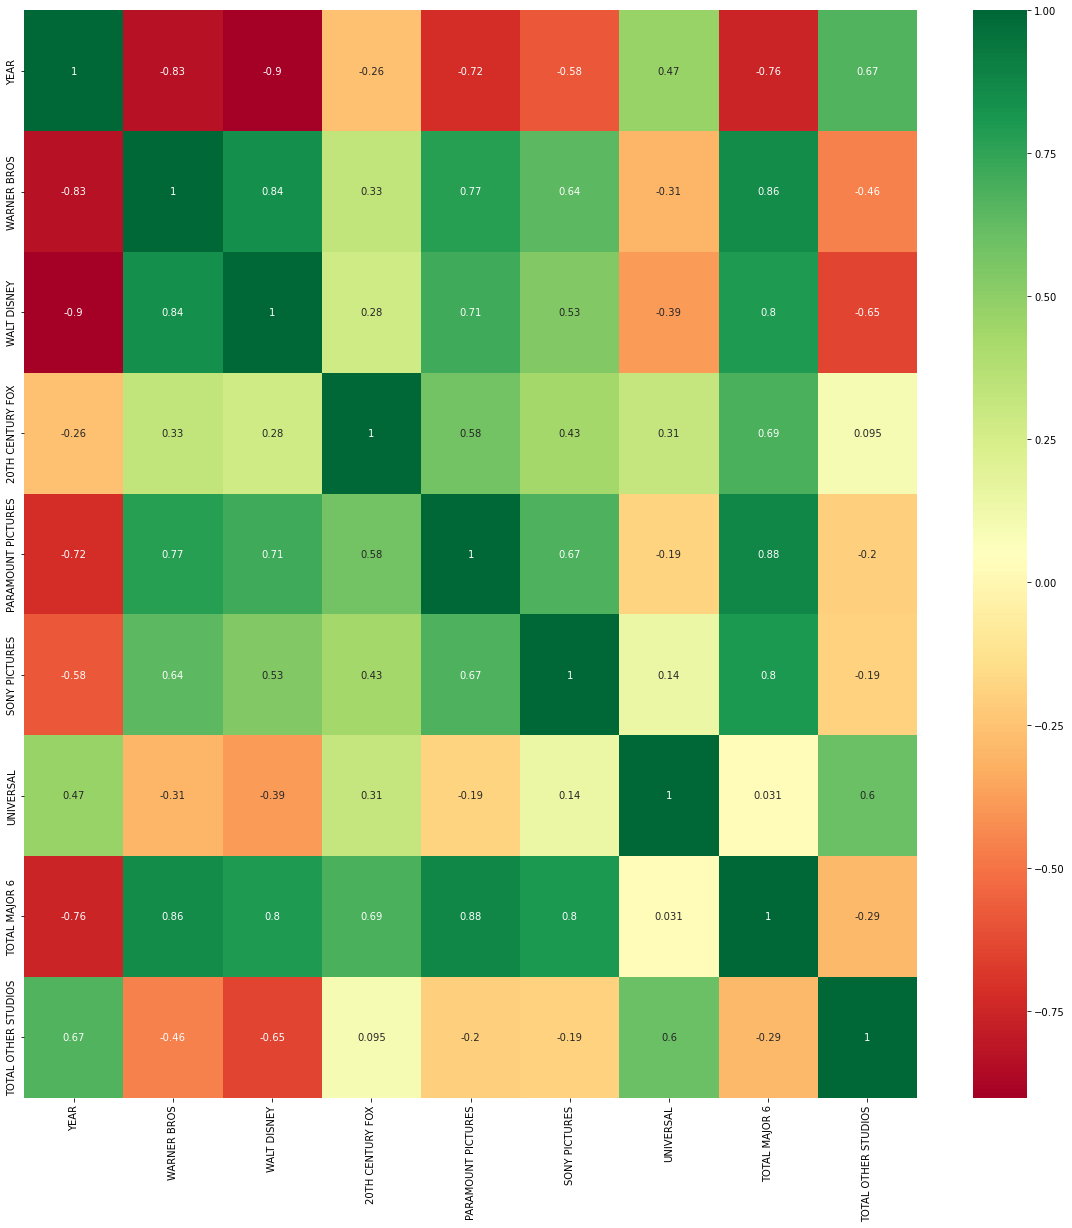

In [53]:
corr_mat = df_WRC.corr()
Feature = corr_mat.index
plt.figure(figsize=(20,20))
sns.heatmap(df_WRC[Feature].corr(),annot=True,cmap="RdYlGn")